## Use Seaborn to investigate the data and present your findings 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
data = pd.read_csv("football.csv")

In [3]:
data = pd.read_csv("football.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [6]:
output_var = 'market_value'

In [7]:
import numpy as np
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[[output_var]]

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.25)

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [8]:
x_train.shape, x_test.shape

((345, 16), (116, 16))

In [9]:
concat_train_data = pd.concat([x_train,y_train],axis=1)

In [10]:
concat_train_data.describe()

,age,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,345.000000,345.000000,345.000000,345.00000,345.000000,344.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,26.802899,2.191304,758.075362,5.44058,56.011594,2.017442,0.040580,3.208696,10.243478,0.313043,0.139130,10.753333
std,3.862686,1.007781,939.588994,1.32894,52.883592,0.980711,0.197601,1.244726,5.866625,0.464405,0.346585,11.801618
min,17.000000,1.000000,3.000000,4.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
25%,24.000000,1.000000,217.000000,4.50000,2.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,456.000000,5.00000,49.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,29.000000,3.000000,860.000000,5.50000,93.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,7664.000000,12.00000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [11]:
concat_train_data.corr()[output_var].sort_values()

position_cat   -0.202518
age            -0.144592
age_cat        -0.116853
club_id        -0.052287
new_foreign     0.097173
region          0.108199
new_signing     0.115376
fpl_points      0.595919
big_club        0.624354
page_views      0.716096
fpl_value       0.771985
market_value    1.000000
Name: market_value, dtype: float64

In [12]:
concat_train_data.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
market_value    float64
dtype: object

In [13]:
concat_train_data.dropna()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0,50.0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,18.80%,26,2.0,Spain,0,6,16,0,0,1.0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,45.00%,221,2.0,Belgium,0,2,12,1,0,50.0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0,20.0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,3.50%,102,2.0,Spain,0,4,12,1,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Boaz Myhill,West+Brom,34,GK,4,100,4.0,5.30%,0,2.0,Wales,0,6,19,0,0,1.5
251,Gabriel Jesus,Manchester+City,20,CF,1,4254,10.5,15.20%,67,3.0,Brazil,0,1,11,1,1,30.0
332,Erik Pieters,Stoke+City,28,LB,3,134,5.0,1.30%,103,2.0,Netherlands,0,4,15,0,0,7.0
363,Modou Barrow,Swansea,24,RW,1,437,5.0,0.10%,34,4.0,The Gambia,0,2,16,0,0,3.0


In [14]:
concat_train_data["region"].fillna(4, inplace=True)

In [15]:
concat_train_data.query('region==2').describe()

,age,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,27.308725,2.261745,714.362416,5.439597,58.375839,2.0,0.067114,3.362416,10.778523,0.322148,0.167785,11.436242
std,3.612851,1.002672,841.513720,1.324041,55.374093,0.0,0.251063,1.134322,5.946661,0.468875,0.374936,12.611401
min,19.000000,1.000000,9.000000,4.000000,0.000000,2.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000
25%,25.000000,1.000000,237.000000,4.500000,2.000000,2.0,0.000000,3.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,454.000000,5.000000,48.000000,2.0,0.000000,3.000000,12.000000,0.000000,0.000000,7.000000
75%,30.000000,3.000000,867.000000,5.500000,98.000000,2.0,0.000000,4.000000,16.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,4454.000000,11.500000,224.000000,2.0,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


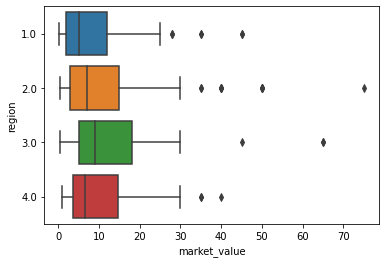

In [16]:
sns.boxplot(y='region',x=output_var,data=concat_train_data,orient='h')
plt.xlabel("market_value")
plt.show()

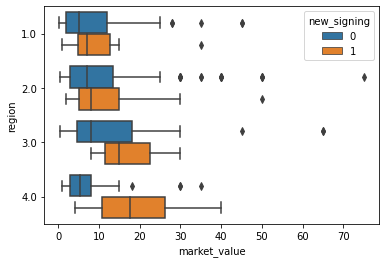

In [17]:
sns.boxplot(y='region',x='market_value',data=concat_train_data,hue='new_signing',orient='h')
plt.xlabel("market_value")
plt.show()

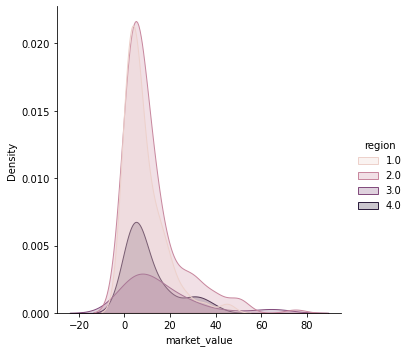

In [18]:
sns.displot(concat_train_data, x=output_var, hue="region", kind="kde", fill=True)

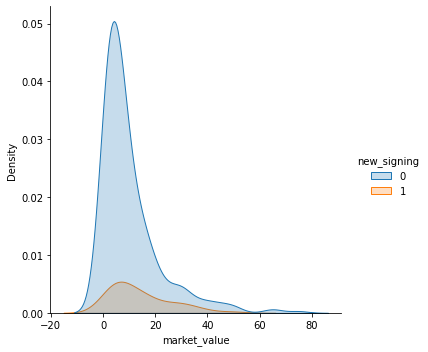

In [19]:
sns.displot(concat_train_data, x=output_var, hue="new_signing", kind="kde", fill=True)

In [20]:
from scipy.stats import ttest_ind
cat1 = concat_train_data.query('new_signing==1')
cat2 = concat_train_data.query('new_signing==0')

ttest_ind(cat1['market_value'], cat2['market_value'])

Ttest_indResult(statistic=2.15115912815947, pvalue=0.032161637210812596)

In [21]:
cat1 = concat_train_data.query('region==2')
cat2 = concat_train_data.query('region==2')

ttest_ind(cat1['market_value'], cat2['market_value'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [22]:
import scipy.stats as stats
keys = np.unique(concat_train_data['region'])
data_market_val = []
for key in keys:
    data_market_val.append(concat_train_data.query("region=="+ str(key) +"")['market_value'])
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data_market_val[0], data_market_val[1], data_market_val[2], data_market_val[3])
print(fvalue, pvalue)

3.4992858893890877 0.015780285630671523


In [23]:
# regions have equal variance (Null Hypothesis not rejected as p > 0.05) - Assuming data generated fromnormal distribution

import scipy.stats as stats
w, pvalue = stats.bartlett(data_market_val[0],data_market_val[1],data_market_val[2],data_market_val[3])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=concat_train_data, res_var='market_value', xfac_var='region')
res.bartlett_summary

26.14100486858159 8.910556249011553e-06


,Parameter,Value
0,Test statistics (T),26.141
1,Degrees of freedom (Df),3.000
2,p value,0.000


In [24]:
# regions do not have equal variance (Null Hypothesis rejected as p < 0.05) - Assuming data not generated from 
# normal distribution

from bioinfokit.analys import stat 
res = stat()
res.levene(df=concat_train_data, res_var='market_value', xfac_var='region')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2.5860
1,Degrees of freedom (Df),3.0000
2,p value,0.0531


In [25]:
## Anova - https://www.reneshbedre.com/blog/anova.html
# Th p-value less than 0.05 suggest that there are significant differences in insurance charges based on region for Smokers
keys = np.unique(concat_train_data.query('new_signing==1')['region'])
data_market_val = []
for key in keys:
    data_market_val.append(concat_train_data.query('new_signing==1').query("region=='"+str(key)+"'")['market_value'])
    
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data_market_val[0],data_market_val[1],data_market_val[2],data_market_val[3])
print(fvalue, pvalue)

nan nan


In [26]:
# regions have equal variance (Null Hypothesis not rejected as p > 0.05) - Assuming data generated from normal distribution

import scipy.stats as stats
w, pvalue = stats.bartlett(data_market_val[0],data_market_val[1],data_market_val[2],data_market_val[3])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=concat_train_data.query('new_signing==1'), res_var='market_value', xfac_var='region')
res.bartlett_summary

nan nan


,Parameter,Value
0,Test statistics (T),0.0463
1,Degrees of freedom (Df),3.0000
2,p value,0.9974


In [27]:
# regions have equal variance (Null Hypothesis not rejected as p > 0.05) - Assuming data not generated from 
# normal distribution

from bioinfokit.analys import stat 
res = stat()
res.levene(df=concat_train_data.query('new_signing==1'), res_var='market_value', xfac_var='region')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.1244
1,Degrees of freedom (Df),3.0000
2,p value,0.9452


In [28]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('market_value ~ C(region)', data=concat_train_data.query('new_signing==1')).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),471.640625,3.0,1.168927,0.332385
Residual,5917.729167,44.0,NaN,NaN


In [29]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
# Mote: as the p-value < 0.05 we reject the null hyothesis that the residuals are Normally distributed

0.8917388319969177 0.00034392107045277953


In [30]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=concat_train_data.query('new_signing==1'), res_var='market_value', xfac_var='region', anova_model='market_value ~ C(region)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,2.0,1.0,2.100000,-10.478682,14.678682,0.630436,0.900000
1,2.0,4.0,6.275000,-4.600103,17.150103,2.178900,0.424028
2,2.0,3.0,5.066667,-13.854223,23.987556,1.011202,0.884482
3,1.0,4.0,8.375000,-5.759243,22.509243,2.237532,0.400333
4,1.0,3.0,7.166667,-13.797803,28.131137,1.290893,0.775076
5,4.0,3.0,1.208333,-18.780504,21.197171,0.228274,0.900000


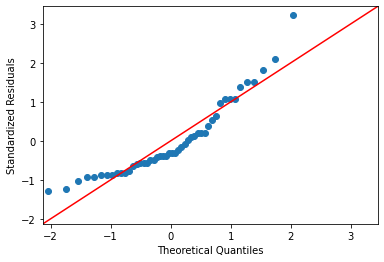

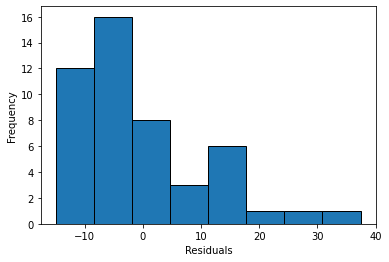

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [32]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('market_value ~ C(new_signing) + C(region) + C(new_signing):C(region)', data=concat_train_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)

                                sum_sq     df          F        PR(>F)
Intercept                  7647.422018    1.0  56.870807  4.357850e-13
C(new_signing)               33.618600    1.0   0.250008  6.173958e-01
C(region)                  1485.853226    3.0   3.683231  1.234447e-02
C(new_signing):C(region)    608.893523    3.0   1.509366  2.118800e-01
Residual                  45316.417473  337.0        NaN           NaN


In [33]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=concat_train_data, res_var='market_value', xfac_var='new_signing', anova_model='market_value ~ C(new_signing) + C(region) + C(new_signing):C(region)')
print(res.tukey_summary)

# for main effect years
res.tukey_hsd(df=concat_train_data, res_var='market_value', xfac_var='region', anova_model='market_value ~ C(new_signing) + C(region) + C(new_signing):C(region)')
print(res.tukey_summary)

# for interaction effect between genotype and years
res.tukey_hsd(df=concat_train_data, res_var='market_value', xfac_var=['region','new_signing'], anova_model='market_value ~ C(new_signing) + C(region) + C(new_signing):C(region)')
print(res.tukey_summary)

   group1  group2      Diff    Lower     Upper   q-value   p-value
0       0       1  3.928683  0.38027  7.477096  3.079913  0.030112
   group1  group2      Diff     Lower      Upper   q-value   p-value
0     2.0     1.0  2.914874 -0.783586   6.613334  2.877844  0.177223
1     2.0     4.0  0.702546 -4.347687   5.752779  0.507962  0.900000
2     2.0     3.0  4.174364 -1.586024   9.934753  2.646104  0.242520
3     1.0     4.0  2.212328 -2.998277   7.422933  1.550350  0.670290
4     1.0     3.0  7.089239  1.187745  12.990732  4.386378  0.011174
5     4.0     3.0  4.876910 -1.953453  11.707274  2.607170  0.254905
      group1    group2       Diff      Lower      Upper   q-value   p-value
0   (2.0, 0)  (2.0, 1)   1.398387  -6.355703   9.152478  0.777888  0.900000
1   (2.0, 0)  (1.0, 0)   2.825466  -1.818323   7.469255  2.624451  0.570715
2   (2.0, 0)  (1.0, 1)   0.701613 -12.200169  13.603395  0.234568  0.900000
3   (2.0, 0)  (4.0, 0)   3.341319  -3.505626  10.188263  2.104950  0.788818
4  

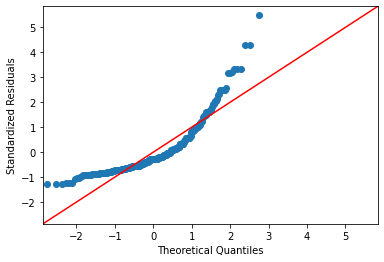

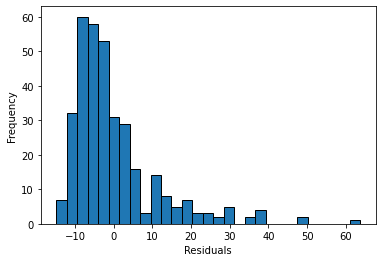

0.7990525960922241 2.343390073783083e-20


In [34]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

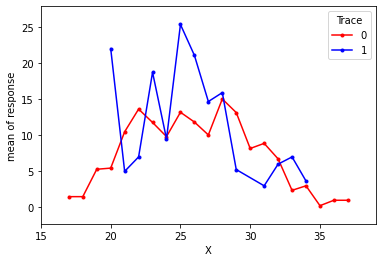

In [35]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=list(concat_train_data['age']), trace=list(concat_train_data['new_signing']), response=list(concat_train_data['market_value']), 
                       colors=['red','blue'])
plt.show()

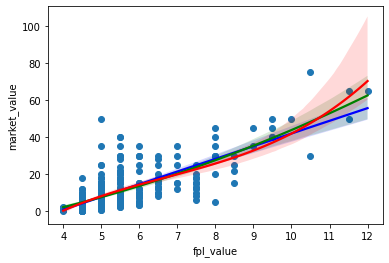

In [36]:
i_attribute = 'fpl_value'
plt.scatter(x=concat_train_data[i_attribute],y=concat_train_data['market_value'])
sns.regplot(x=i_attribute,y='market_value', data=concat_train_data,  scatter=None, color='b', order=1)
sns.regplot(x=i_attribute,y='market_value', data=concat_train_data,  scatter=None, color='g', order=2)
sns.regplot(x=i_attribute,y='market_value', data=concat_train_data,  scatter=None, color='r', order=3)
plt.show()

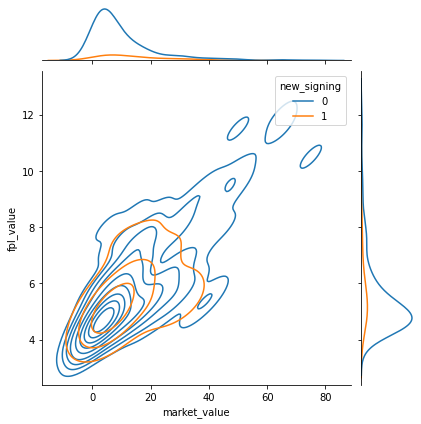

In [37]:
sns.jointplot(x="market_value",y="fpl_value",hue='new_signing',data=concat_train_data,kind='kde')
plt.xlabel("market_value in $")
plt.ylabel("fpl_value")
plt.show()

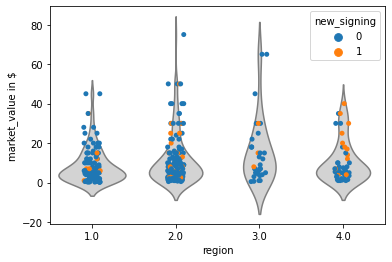

In [38]:
sns.violinplot(x='region',y='market_value',data=concat_train_data,inner=None,color='lightgray')
sns.stripplot(x='region',y='market_value',data=concat_train_data,size=5,hue='new_signing',jitter=True)
plt.ylabel("market_value in $")
plt.show()

In [39]:
from scipy.stats import chi2_contingency
cross_data = pd.crosstab(concat_train_data.region, concat_train_data.new_signing)
stat, p, dof, expected = chi2_contingency(cross_data) 
print(cross_data)
print(stat,p)

new_signing    0   1
region              
1.0          109   8
2.0          124  25
3.0           30   3
4.0           34  12
12.244317869063646 0.006591415124873399


<AxesSubplot:>

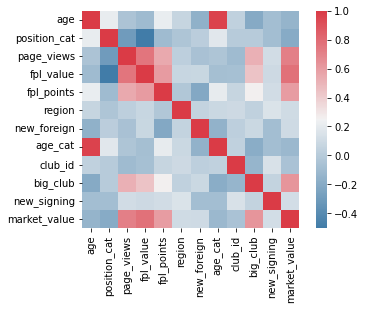

In [40]:
corr = concat_train_data.corr()
import seaborn as sns
import numpy as np
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

In [41]:
corr["market_value"]

age            -0.144592
position_cat   -0.202518
page_views      0.716096
fpl_value       0.771985
fpl_points      0.595919
region          0.104927
new_foreign     0.097173
age_cat        -0.116853
club_id        -0.052287
big_club        0.624354
new_signing     0.115376
market_value    1.000000
Name: market_value, dtype: float64

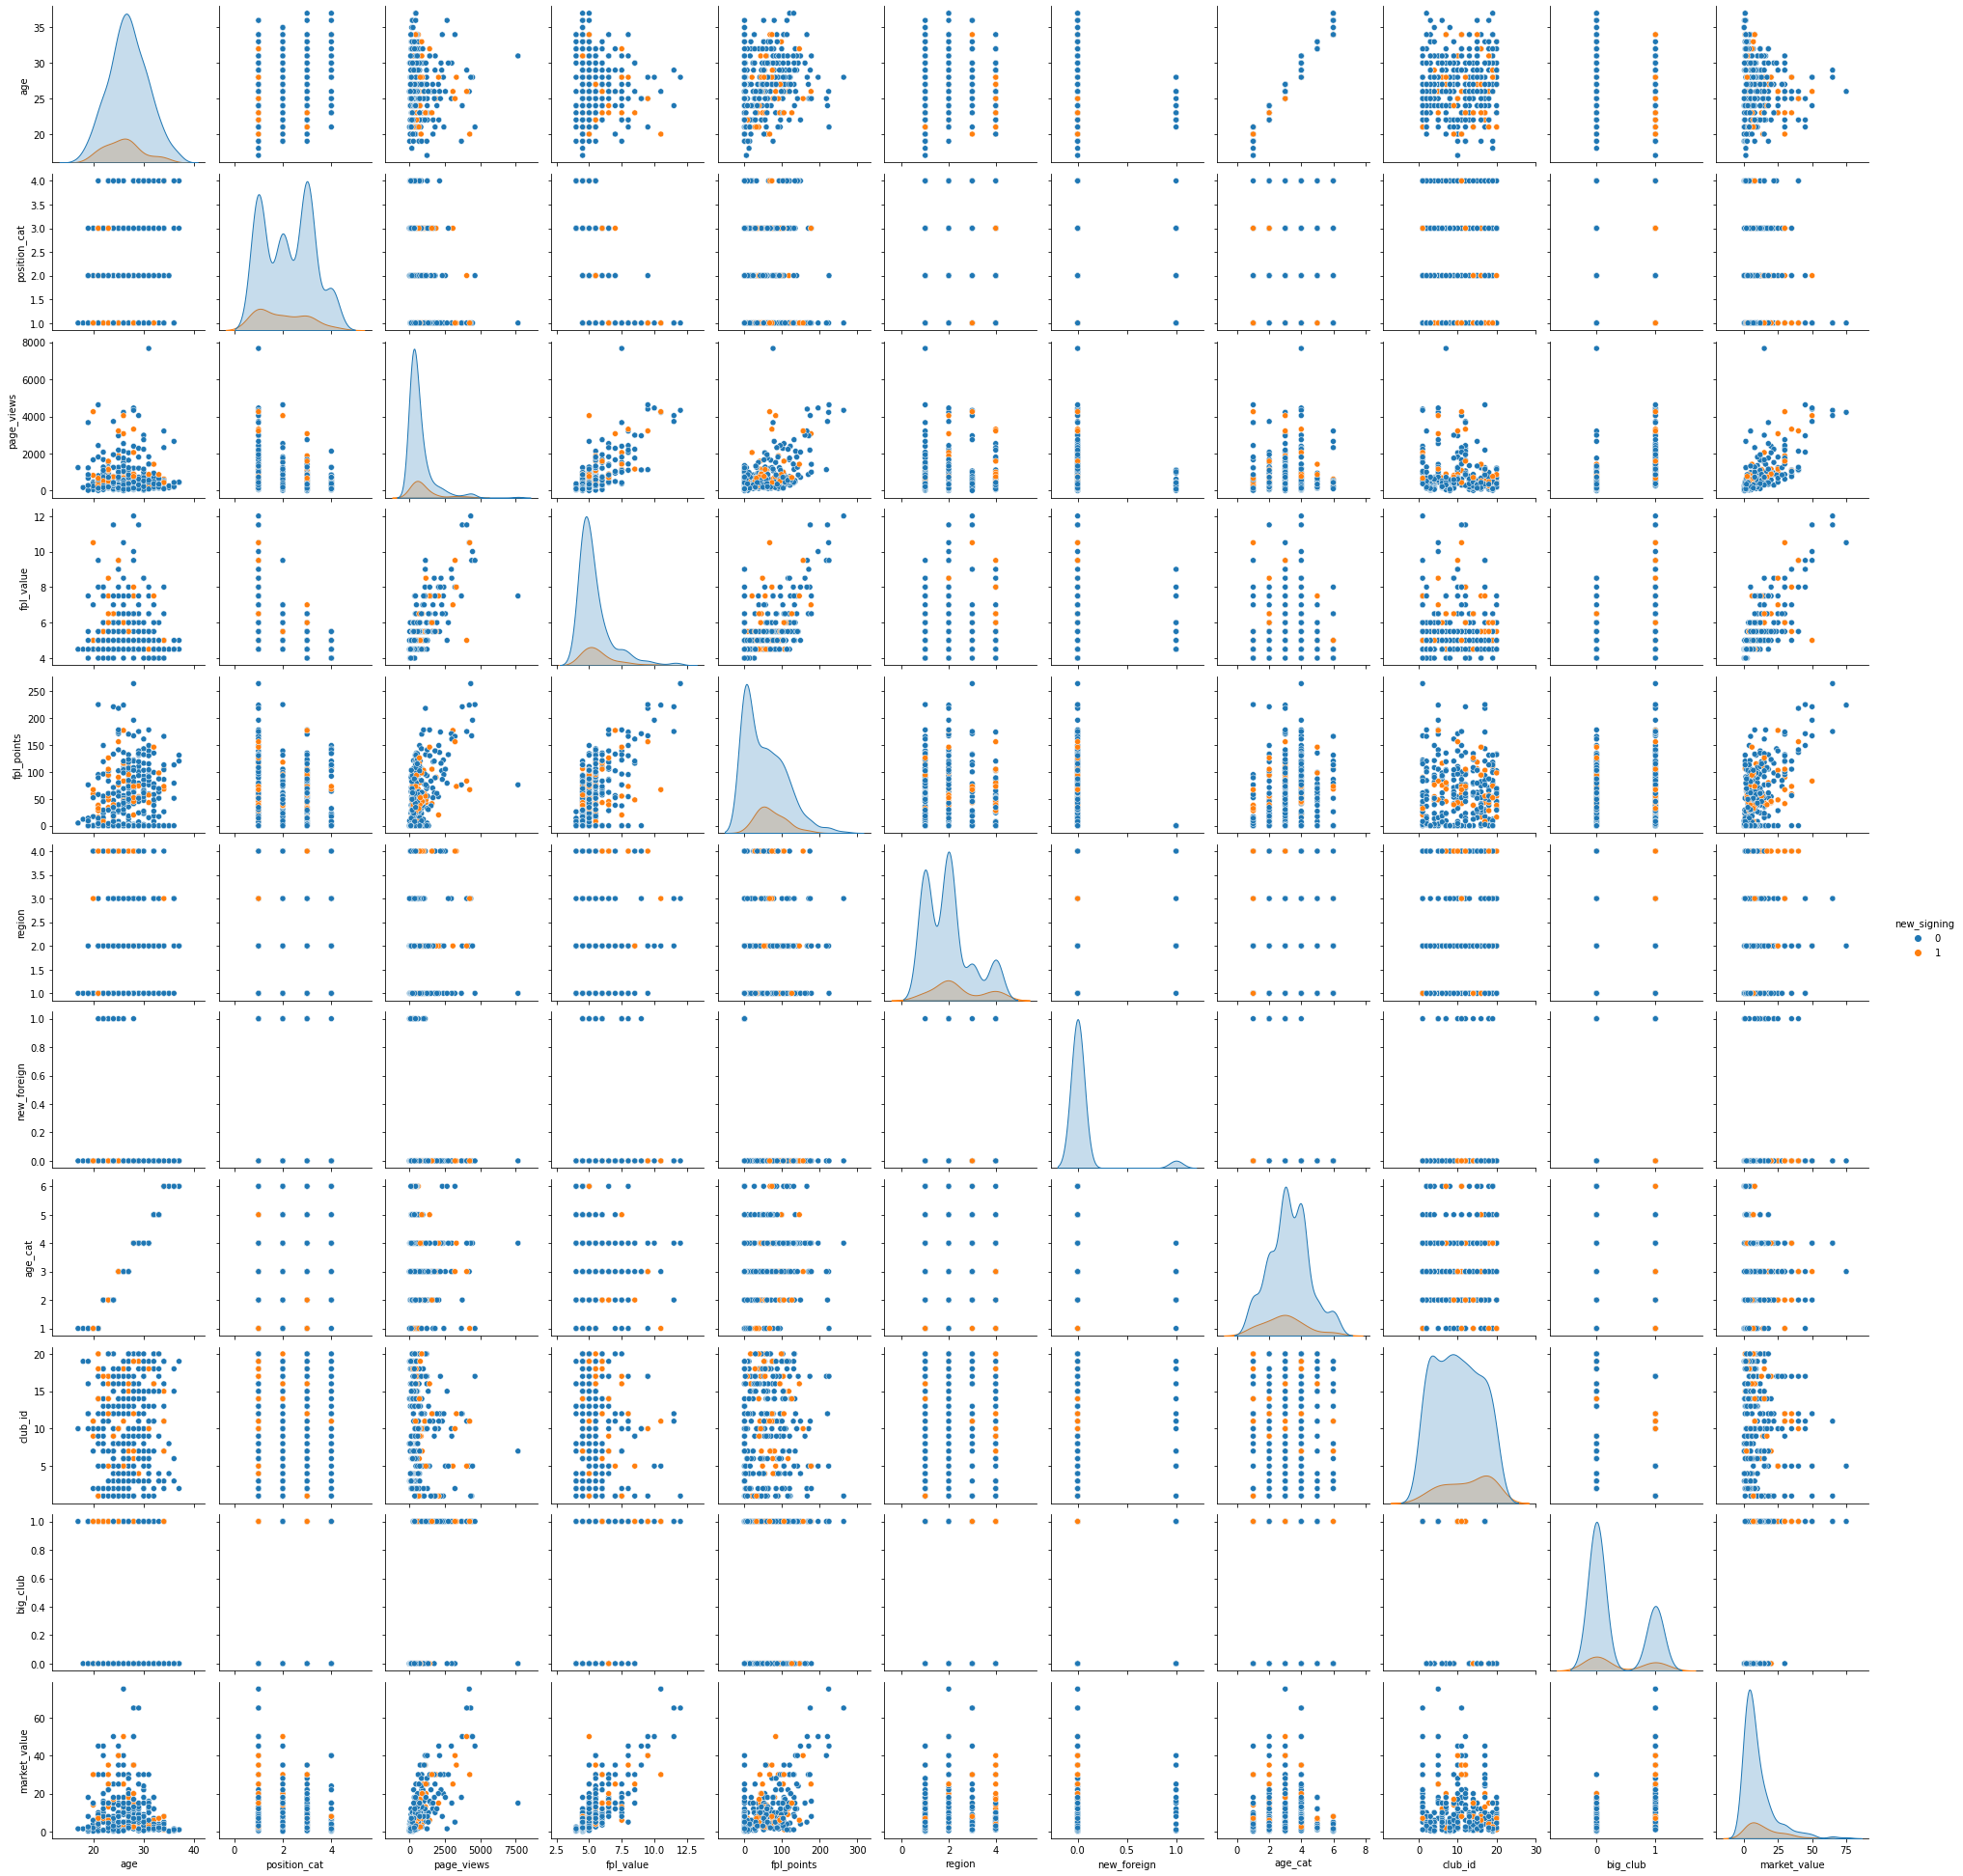

In [42]:
sns.pairplot(concat_train_data, hue="new_signing", height=2.5)

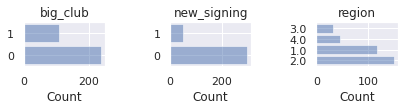

In [43]:
sns.set(rc={'figure.figsize':(6.7,2.27)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
attr = ['big_club','new_signing','region']
for i in range(0,3):
    ax = fig.add_subplot(2, 3, i+1)
    counts = concat_train_data[attr[i]].value_counts()
    myproblems = list(counts.index)
    my_problem_counts = list(counts)
    y_pos = np.arange(len(myproblems))
    plt.barh(y_pos, my_problem_counts, align='center', alpha=0.5)
    plt.yticks(y_pos, myproblems)
    plt.xlabel('Count')
    plt.title(attr[i])

In [44]:
encoded_data = pd.get_dummies(concat_train_data, columns=["big_club","new_signing","region"],drop_first=True)
encoded_data.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,nationality,new_foreign,age_cat,club_id,market_value,big_club_1,new_signing_1,region_2.0,region_3.0,region_4.0
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,5.60%,167,Germany,0,4,1,50.0,1,0,1,0,0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,18.80%,26,Spain,0,6,16,1.0,0,0,1,0,0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,45.00%,221,Belgium,0,2,12,50.0,1,0,1,0,0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,1.50%,122,England,0,4,1,20.0,1,0,0,0,0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,3.50%,102,Spain,0,4,12,30.0,1,0,1,0,0


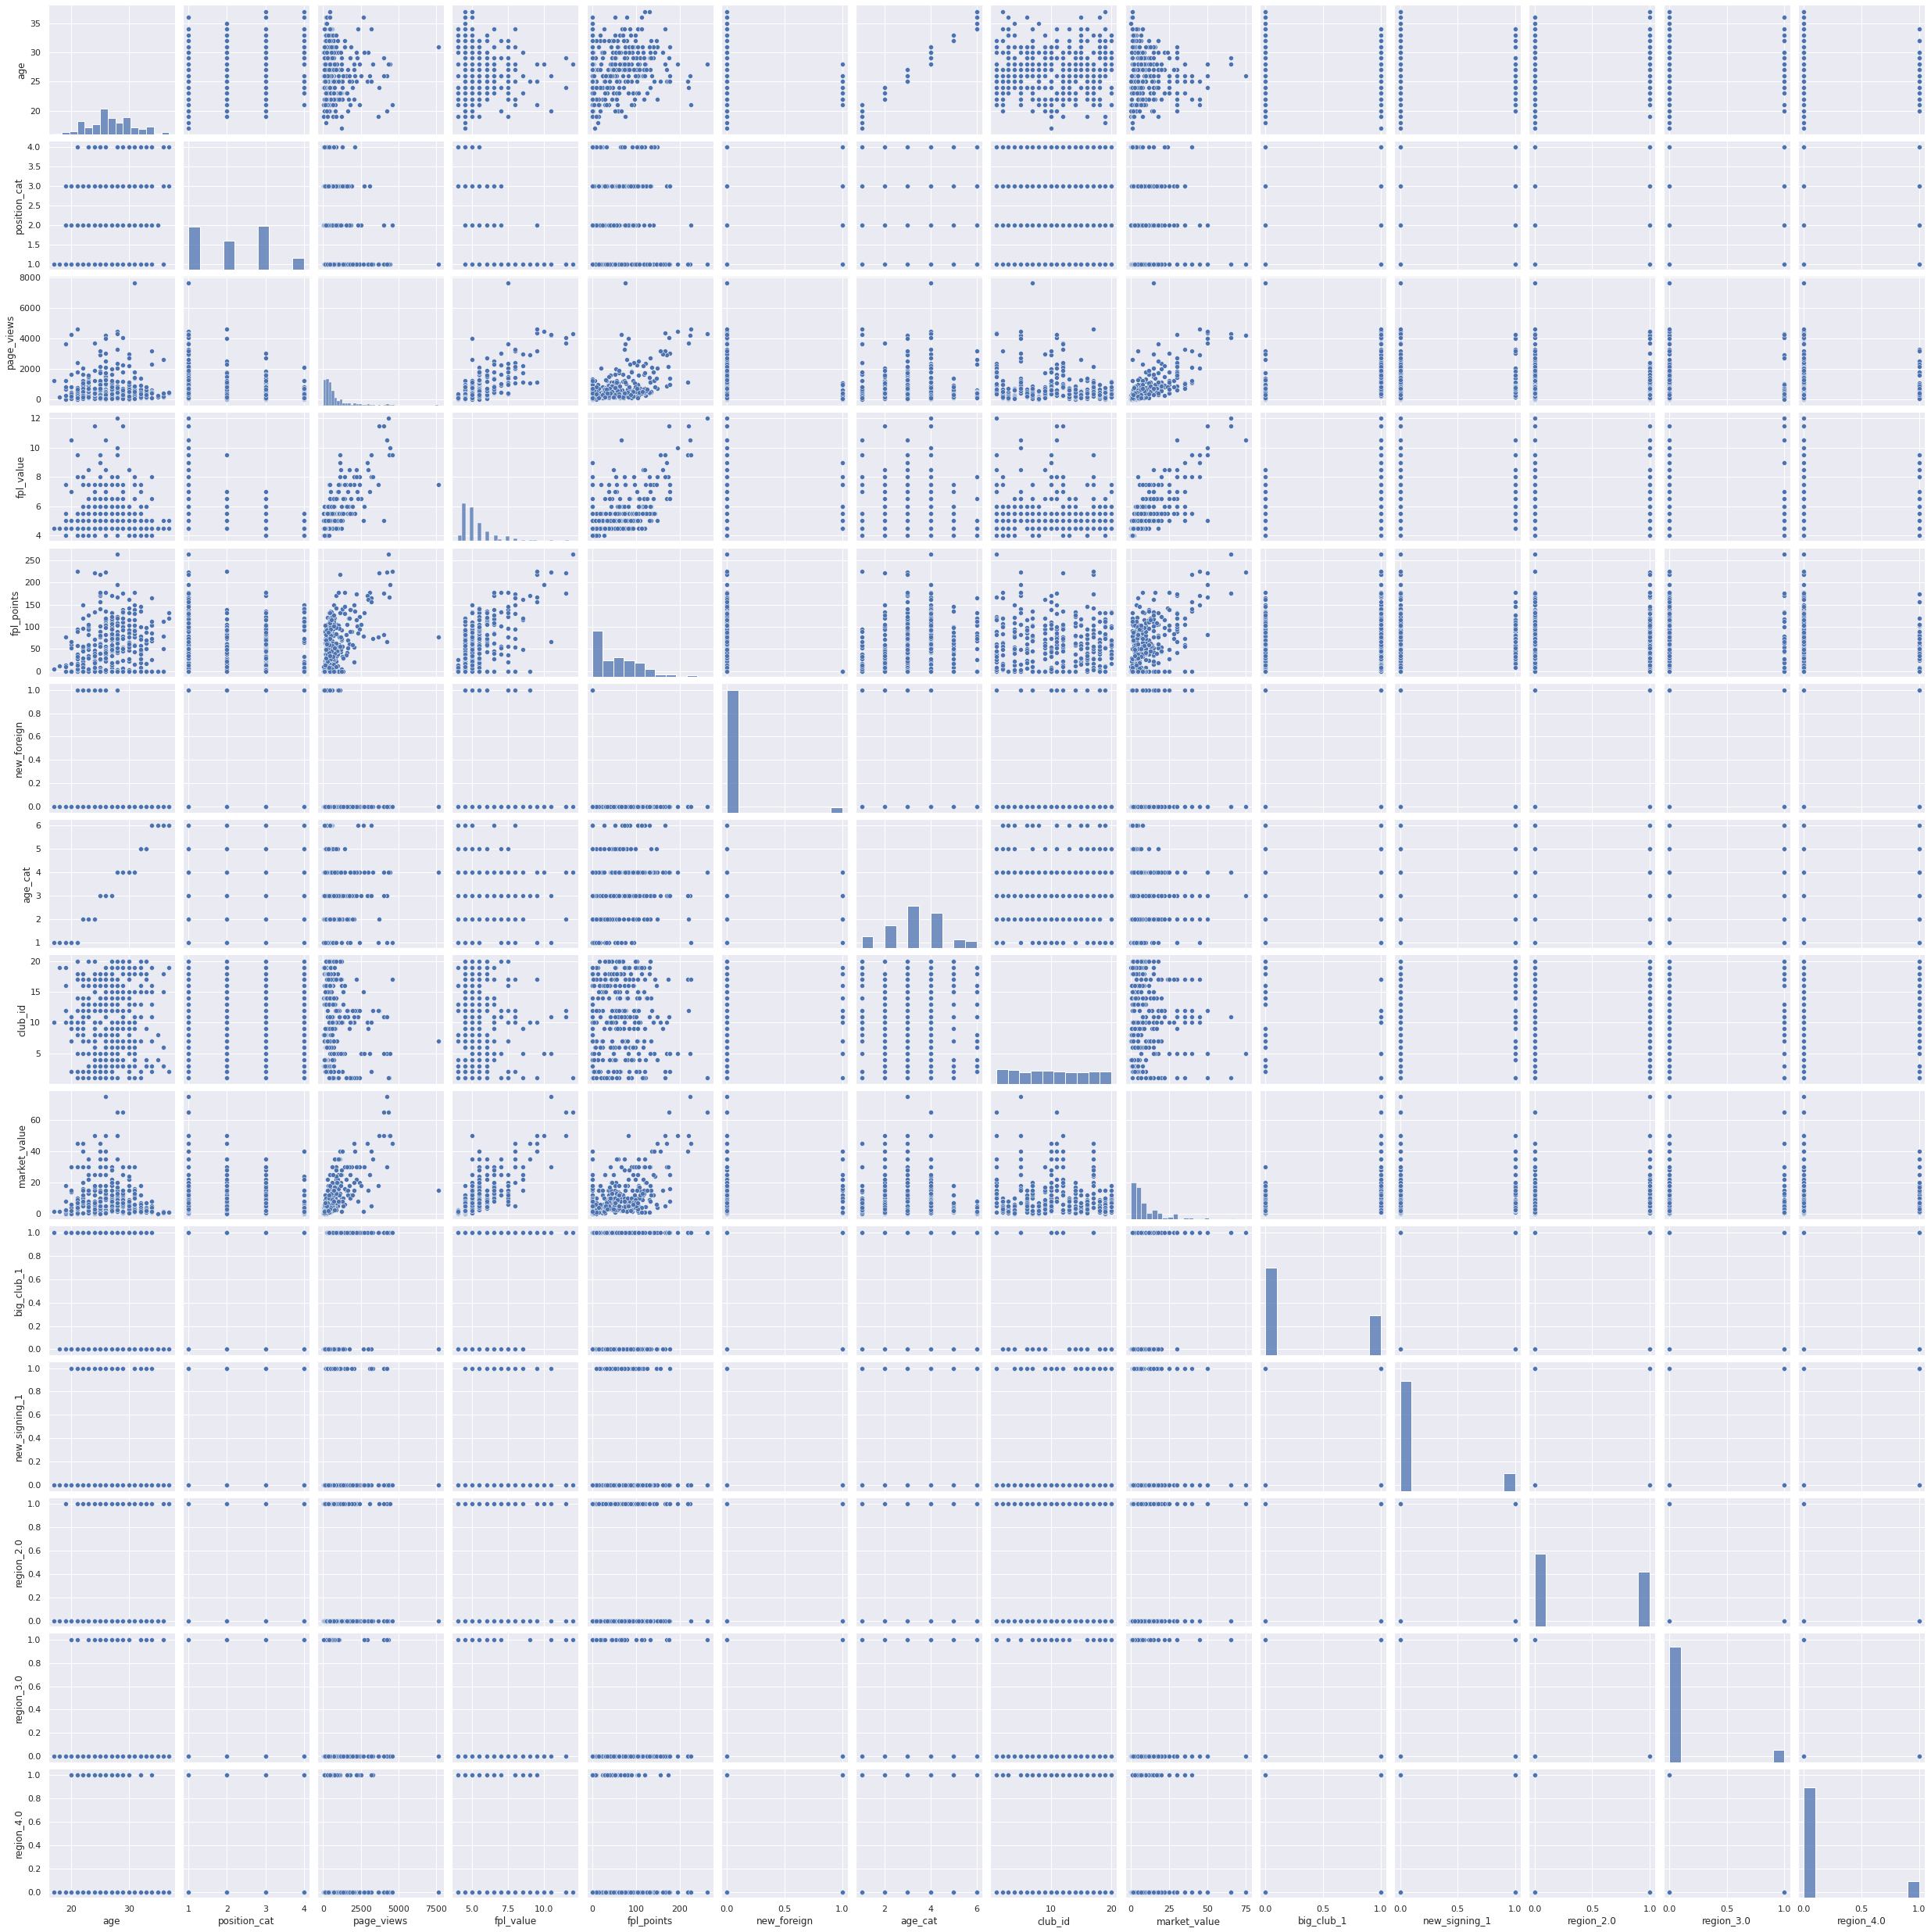

In [45]:
sns.pairplot(encoded_data, height=2.5)

In [46]:
encoded_data.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,nationality,new_foreign,age_cat,club_id,market_value,big_club_1,new_signing_1,region_2.0,region_3.0,region_4.0
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,5.60%,167,Germany,0,4,1,50.0,1,0,1,0,0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,18.80%,26,Spain,0,6,16,1.0,0,0,1,0,0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,45.00%,221,Belgium,0,2,12,50.0,1,0,1,0,0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,1.50%,122,England,0,4,1,20.0,1,0,0,0,0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,3.50%,102,Spain,0,4,12,30.0,1,0,1,0,0


In [47]:
encoded_data["fpl_sel"] = encoded_data['fpl_sel'].replace('%','',regex=True).astype('float')/100
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoded_data['market_value_cat'] = label_encoder.fit_transform(encoded_data['market_value'])
encoded_data['age_cat2'] = label_encoder.fit_transform(encoded_data['age'])
encoded_data['position_cat2'] = label_encoder.fit_transform(encoded_data['position'])
encoded_data['region2'] = label_encoder.fit_transform(encoded_data['nationality'])
encoded_data = encoded_data.drop(["name", "club", "nationality", "position", "market_value"], axis=1)

In [48]:
output_var = "market_value_cat"

In [49]:
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]].to_numpy()
y = encoded_data[[output_var]].to_numpy()


In [50]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]])
Y = encoded_data[[output_var]]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
print(X_train.shape, X_test.shape)

(276, 17) (69, 17)


## 2. Build models using all the algorithms below to predict market_value
## 3.Tune the hyperparameters and build the most accurate model
+ Linear Regression [done]
+ Lasso Regression [done]
+ Ridge Regression [done]
+ Nearest Neighbour Regression [done]
+ Support Vector Regression [done]
+ Tree Regression [done]
+ Random Forest Regression [done]
+ Gradient Boosted Regression [done]

In [52]:
#Linear Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(), LinearRegression())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  0.6852867918063055
R2 Score:  0.6852867918063055
RMSE value:  5.6799098501072445
Training R2 Score:  0.7748783514254491


In [53]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space["fit_intercept"] = [True,False]
space["normalize"] = [True,False]
space["copy_X"] = [True,False]
space["n_jobs"] = [100,200,300]
space["positive"] = [True,False]

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -4.752328511169929
Best Hyperparameters:  {'positive': False, 'normalize': True, 'n_jobs': 300, 'fit_intercept': True, 'copy_X': False}


In [54]:
model = make_pipeline(QuantileTransformer(), LinearRegression(positive = True, normalize = True, n_jobs = 100,fit_intercept = True, copy_X = True))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -4.87808800038146
R2 Score:  -4.87808800038146
RMSE value:  24.547202170014966
Training R2 Score:  0.7536795752044444


In [55]:
#Lasso Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(), Lasso())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.2431114490121522
R2 Score:  -0.2431114490121522
RMSE value:  11.288571571413804
Training R2 Score:  0.5520388160746623


In [56]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100]
space['copy_X'] = [True, False]
space['warm_start'] = [True, False]
space['selection'] = ['cyclic', 'random']
space['precompute'] = [True, False,]

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -4.7247157723305975
Best Hyperparameters:  {'warm_start': True, 'selection': 'cyclic', 'precompute': False, 'normalize': True, 'max_iter': 50, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.01}


In [57]:
model = make_pipeline(QuantileTransformer(), Lasso(warm_start = False, selection = "cyclic", precompute = False, normalize = True, max_iter= 10, fit_intercept = True, copy_X = True, alpha = 0.1))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.6869254143297148
R2 Score:  -0.6869254143297148
RMSE value:  13.150186078184328
Training R2 Score:  0.6706358075168728


In [58]:
#Ridge Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(), Ridge())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -3.1181178147837922
R2 Score:  -3.1181178147837922
RMSE value:  20.54628657410038
Training R2 Score:  0.7739295724351498


In [59]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] =  ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100,500,1000]
space['copy_X'] = [True, False]

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -4.726702195107181
Best Hyperparameters:  {'solver': 'sparse_cg', 'normalize': False, 'max_iter': 500, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.1}


In [60]:
model = make_pipeline(QuantileTransformer(), Ridge(solver = "lsqr", normalize = False, max_iter = 100, fit_intercept = True, copy_X = True, alpha = 0.001))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -3.356303158848891
R2 Score:  -3.356303158848891
RMSE value:  21.13211693510376
Training R2 Score:  0.77485088927012


In [61]:
#RNearest Neighbour Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(), KNeighborsRegressor())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.12105701851442086
R2 Score:  -0.12105701851442086
RMSE value:  10.720074626605918
Training R2 Score:  0.7366981116171707


In [62]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = KNeighborsRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_neighbors'] = [5,10,15,20]
space['weights']= ['uniform' , 'distance']
space['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']                 

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -5.17694924109932
Best Hyperparameters:  {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'auto'}


In [63]:
model = make_pipeline(QuantileTransformer(), KNeighborsRegressor(weights = "uniform", n_neighbors = 15, algorithm = "brute"))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  0.044408464671797265
R2 Score:  0.044408464671797265
RMSE value:  9.897376805641494
Training R2 Score:  0.6834959069574117


In [64]:
#Support Vector Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(), SVR())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  0.023134245874745996
R2 Score:  0.023134245874745996
RMSE value:  10.006942402506272
Training R2 Score:  0.6751226936801317


In [65]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_iter'] = [1,10,50,100]
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['C']: [0.1, 1, 10, 100, 1000]

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -7.765351091296674
Best Hyperparameters:  {'max_iter': 50, 'kernel': 'linear', 'gamma': 0.001}


In [66]:
model = make_pipeline(QuantileTransformer(), SVR(max_iter = 50, kernel = "rbf", gamma = 0.001))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.05292509411721613
R2 Score:  -0.05292509411721613
RMSE value:  10.389214088820333
Training R2 Score:  -0.008668669661438422


In [67]:
#Tree Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(), DecisionTreeRegressor())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -2.123472498832092
R2 Score:  -2.123472498832092
RMSE value:  17.893809147219088
Training R2 Score:  1.0


In [68]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_depth']= [None,1,2,3,4,5,6,7]
space['max_features']= [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7 ]
space['min_samples_split']= [2,0.3,0.5]
space['min_samples_leaf']=[1, 0.3,0.5]
space['criterion'] = ['mse','friedman_mse','mae']
space['splitter'] = ['best','random']

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -4.583486397668664
Best Hyperparameters:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6, 'criterion': 'friedman_mse'}


In [69]:
model = make_pipeline(QuantileTransformer(), DecisionTreeRegressor(splitter = "best", min_samples_split = 2, min_samples_leaf = 0.5, max_features = "sqrt", max_depth = 1, criterion = "mse"))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.0779117798923068
R2 Score:  -0.0779117798923068
RMSE value:  10.511763147124636
Training R2 Score:  0.16433457602768997


In [70]:
#Random Forest Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(),RandomForestRegressor())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -1.2256217403063614
R2 Score:  -1.2256217403063614
RMSE value:  15.104614133301851
Training R2 Score:  0.9701559556610162


In [71]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [100,200,300]
space['min_samples_split']= [1,2,3,4]
space['min_samples_leaf']=[1,2,0,4]
space['bootstrap'] = [True,False]
space['warm_start'] = [True,False]

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -3.7372468406428223
Best Hyperparameters:  {'warm_start': False, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': True}


In [72]:
model = make_pipeline(QuantileTransformer(), RandomForestRegressor(warm_start = False, n_estimators = 200, min_samples_split = 4, min_samples_leaf = 4, bootstrap = True))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -1.8890009761801254
R2 Score:  -1.8890009761801254
RMSE value:  17.20908588306235
Training R2 Score:  0.9082141556287406


In [73]:
#Gradient Boosted Regression

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import QuantileTransformer
model = make_pipeline(QuantileTransformer(),GradientBoostingRegressor())
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.2828335224826659
R2 Score:  -0.2828335224826659
RMSE value:  11.467509478656702
Training R2 Score:  0.9577730117399855


In [74]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space["n_estimators"] = [100, 200, 500]
space["max_features"] = ["auto", "sqrt", "log2"]
space["max_depth"] = [4,5,6,7,8]
space["alpha"] = [1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 0.99, 10, 100]
space["loss"] = ["ls", "lad", "huber", "quantile"]

search = RandomizedSearchCV(model, space, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print("Best Score: ", result.best_score_)
print("Best Hyperparameters: ", result.best_params_)

Best Score:  -3.4027296705506505
Best Hyperparameters:  {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 5, 'loss': 'ls', 'alpha': 0.01}


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(QuantileTransformer(), GradientBoostingRegressor(n_estimators = 500, max_features = "sqrt", max_depth = 4, loss = "ls", alpha = 0.99))
model.fit(X_train, y_train)
print("Score of model: ", model.score(X_test, y_test))
model_pred = model.predict(X_test)
model_df = pd.DataFrame(list(zip(y_test,model_pred, y_test-model_pred)), columns=['Actual output','Predicted output',"Residuals"])

#sns.lmplot(x='Actual output', y='Residuals', data=model_df)

print("R2 Score: ", r2(y_test, model_pred))
print("RMSE value: ", mse(y_test, model_pred)**0.5)
y_pred=model.predict(X_train)
print("Training R2 Score: ", r2(y_train, y_pred))

#sns.displot(model_df,x='Residuals', kind='kde', fill=True)

Score of model:  -0.5149130155322066
R2 Score:  -0.5149130155322066
RMSE value:  12.461714753814787
Training R2 Score:  0.9999253029661614


## 4.Implement a Genetic Algorithm for learning attribute weights for the Nearest Neighbour Algorithm. Implement at least one mechanism for maintaining Diversity within the Population 

In [78]:
# X, y = encoded_data.loc[:, encoded_data.columns != "market_value_cat"], encoded_data["market_value_cat"]
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
output_var = "market_value"
X, y = data.loc[:, data.columns != output_var].to_numpy(), data[output_var].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
import csv
import random as rand
import math
import operator


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    # print('Distances: ')
    # print(*distances, sep=",")
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(min(k, len(distances))):
        neighbors.append(distances[x][0])
    return neighbors


def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        #print('Neighbors: ' + neighbors[x][-1])
        #print(classVotes)
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    # print(classVotes)#coba1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct = correct+1
    return (correct / float(len(testSet))) * 100.0


def generateChromosome(chromosome):
    return [rand.randint(1, 100) for x in range(chromosome)]


def desimal(biner):
    return int(biner, 2)


def kNN(k, testSet, trainingSet):
    # generate predictions
    predictions = []
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    #print('Accuracy: ' + repr(accuracy) + '%')
    return accuracy


def crossover(one, two):
    parent = [one, two]
    zero = '0'
    male = "{0:b}".format(parent[0])
    female = "{0:b}".format(parent[1])
    length = max(len(male), len(female))
    if length % 2 == 1:
        length = length + 1
    while len(male) < length:
        male = zero + male

    while len(female) < length:
        female = zero + female

    child = []
    half = int(length / 2)
    male1 = male[:half]
    male2 = male[half:]

    female1 = female[:half]
    female2 = female[half:]

    child.append(desimal(male1 + female2))
    child.append(desimal(female1 + male2))
    return child



# prepare data
trainingSet = x_train
testSet = x_test
split = 0.67

print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))

accResult = [[]]
chromosome = 10
population = generateChromosome(chromosome)

for x in range(len(population)):
  accResult.append([population[x], kNN(population[x], testSet, trainingSet)])

del accResult[0]

for x in range(200):
        status_one = True
        status_zero = True
        accResult = sorted(accResult, key=lambda l: l[1], reverse=True)
        newChromosome = crossover(accResult[0][0], accResult[1][0])
        for i in accResult:
            if newChromosome[0] == i[0]:
                status_zero = False;
            if newChromosome[1] == i[0]:
                status_one = False
        if status_zero:
            accResult.append([newChromosome[0], kNN(newChromosome[0], testSet, trainingSet)])
        if status_one:
            accResult.append([newChromosome[1], kNN(newChromosome[1], testSet, trainingSet)])

accResult = sorted(accResult, key=lambda l: l[1],reverse=True)
print("accuracy: \n")
print(accResult[0][1])  

## Note: The Flask application is placed in "application" folder.